<a href="https://colab.research.google.com/github/marcelodepaoli/15_Arvores_de_Decisao/blob/main/01_%C3%81rvores_de_Decis%C3%A3o_e_Florestas_Aleat%C3%B3rias_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Decisão e Florestas Aleatórias em Python

## Importar bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenha os dados

In [28]:
df = pd.read_csv('kyphosis.csv')

In [29]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Vamos apenas verificar um gráfico de pares simples para este pequeno conjunto de dados.

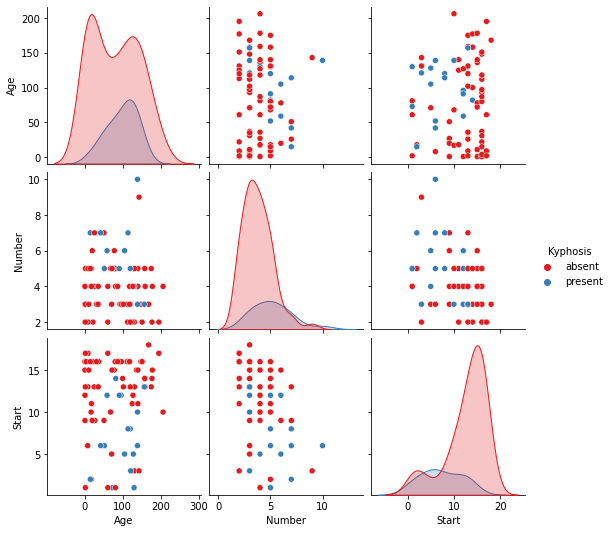

In [30]:
sns.pairplot(df,hue='Kyphosis', palette='Set1')

## Train Test Split

Vamos dividir os dados em um conjunto de treinamento e um conjunto de teste

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Kyphosis',axis=1)

In [33]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [34]:
y = df['Kyphosis']

In [35]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [36]:
y = pd.get_dummies(y,columns='Kyphosis',drop_first=True)

In [37]:
y.head()

,present
0,0
1,0
2,1
3,0
4,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Árvores de decisão

Começaremos treinando uma única árvore de decisão.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Vamos avaliar nossa árvore de decisão.

In [42]:
predictions = dtree.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.50      1.00      0.67         2

    accuracy                           0.92        25
   macro avg       0.75      0.96      0.81        25
weighted avg       0.96      0.92      0.93        25



In [45]:
print(confusion_matrix(y_test,predictions))

[[21  2]
 [ 0  2]]


## Visualização da Árvore

O Scikit learn na verdade tem alguns recursos de visualização integrados para árvores de decisão, você não utilizara esse recurso com frequência e é necessário instalar a biblioteca pydot

In [47]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [48]:
features = list(df.columns[1:])

In [49]:
features

['Age', 'Number', 'Start']

In [53]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,impurity=False)

In [54]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

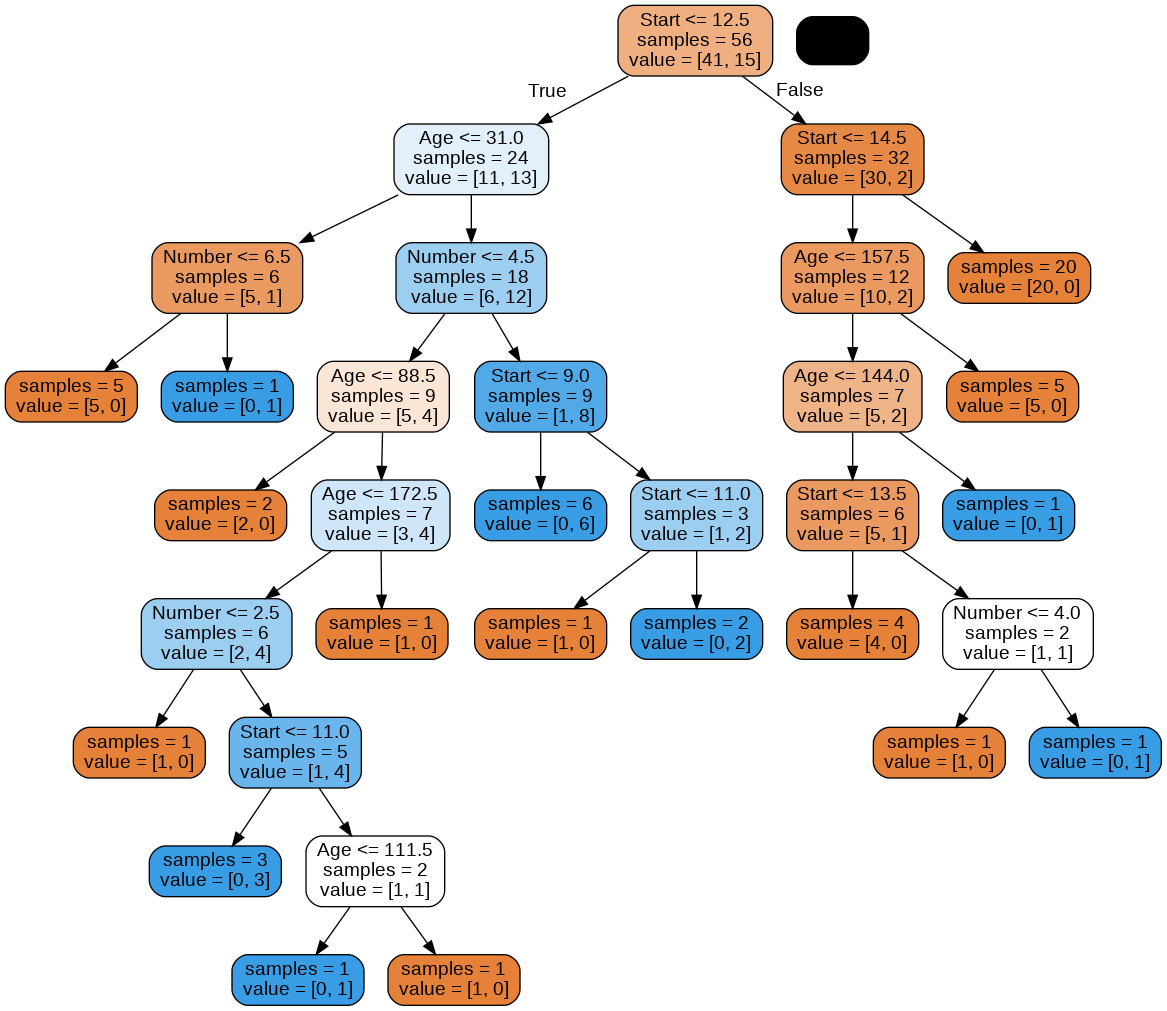

In [55]:
Image(graph.create_png())


## Florestas Aleatórias

Agora vamos comparar o modelo de árvore de decisão com uma floresta aleatória.